In [1]:
import pandas as pd
from sklearn import preprocessing

df=pd.read_csv('C:/IDS/TRAINING/Applied Data Science Techniques with Python/Course_Data/dungaree.csv')

In [2]:
# Drop Storeid & SalesTot
df=df.drop(['STOREID', 'SALESTOT'], axis=1)

In [3]:
df

,FASHION,LEISURE,STRETCH,ORIGINAL
0,182,1528,496,2203
1,129,2247,296,1890
2,107,1652,267,2342
3,117,1744,419,2119
4,110,1736,755,1781
...,...,...,...,...
684,62,1526,871,1956
685,57,1564,8,1769
686,104,1963,274,2053
687,51,2057,393,1901


In [4]:
# Verileri Standardize edelim
standardized_df=preprocessing.scale(df)

In [5]:
standardized_df

array([[ 2.75330253, -1.10791719,  0.24562839,  1.21352058],
       [ 1.12716676,  0.94293908, -0.69983508,  0.13938196],
       [ 0.45216701, -0.75422293, -0.83692728,  1.69053422],
       ...,
       [ 0.36012159,  0.13286511, -0.80383606,  0.69875766],
       [-1.26601418,  0.40098819, -0.2412853 ,  0.17713124],
       [ 0.14534894,  0.39243107,  0.26926498, -0.08025022]])

In [6]:
standardized_df=pd.DataFrame(standardized_df)

In [7]:
standardized_df

,0,1,2,3
0,2.753303,-1.107917,0.245628,1.213521
1,1.127167,0.942939,-0.699835,0.139382
2,0.452167,-0.754223,-0.836927,1.690534
3,0.758985,-0.491805,-0.118375,0.925253
4,0.544212,-0.514624,1.470004,-0.234679
...,...,...,...,...
684,-0.928514,-1.113622,2.018372,0.365878
685,-1.081923,-1.005232,-2.061302,-0.275860
686,0.360122,0.132865,-0.803836,0.698758
687,-1.266014,0.400988,-0.241285,0.177131


In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6)
kmeans.fit(standardized_df)

KMeans(n_clusters=6)

In [9]:
labels=kmeans.predict(standardized_df)

In [10]:
labels

array([0, 0, 3, 3, 1, 1, 2, 2, 3, 3, 4, 3, 2, 5, 2, 4, 0, 3, 1, 0, 2, 2,
       2, 0, 1, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 2, 1, 4, 3, 0, 1, 1, 0, 1,
       2, 1, 4, 0, 3, 2, 2, 1, 3, 0, 0, 0, 3, 0, 1, 1, 2, 5, 1, 2, 3, 0,
       1, 1, 3, 5, 1, 2, 2, 2, 4, 2, 0, 1, 1, 2, 1, 2, 0, 3, 2, 3, 2, 2,
       4, 2, 1, 2, 5, 2, 4, 2, 0, 1, 3, 0, 0, 4, 1, 3, 1, 2, 0, 4, 1, 3,
       2, 3, 1, 3, 4, 2, 2, 2, 4, 0, 4, 4, 1, 0, 1, 4, 3, 2, 2, 2, 2, 0,
       3, 3, 3, 3, 1, 1, 3, 2, 2, 3, 0, 3, 1, 1, 3, 3, 3, 0, 2, 4, 3, 2,
       0, 1, 3, 3, 0, 4, 2, 3, 2, 2, 0, 2, 2, 0, 3, 3, 2, 1, 1, 2, 3, 5,
       3, 3, 3, 0, 3, 3, 2, 2, 1, 1, 0, 4, 2, 3, 0, 0, 3, 1, 3, 3, 1, 4,
       3, 0, 2, 1, 0, 0, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2, 1, 4, 3, 2, 3, 1,
       3, 0, 2, 3, 2, 4, 0, 1, 1, 2, 2, 0, 2, 0, 3, 1, 0, 3, 1, 0, 2, 2,
       4, 2, 1, 3, 1, 3, 2, 0, 1, 4, 3, 2, 2, 4, 0, 3, 3, 2, 2, 2, 1, 3,
       2, 3, 4, 3, 2, 2, 0, 1, 0, 3, 4, 1, 3, 1, 4, 0, 2, 2, 3, 2, 3, 0,
       0, 4, 0, 5, 3, 2, 3, 3, 0, 3, 3, 4, 3, 4, 1,

In [11]:
Clusters=pd.DataFrame(data=labels, columns=["cluster"])

In [12]:
Clusters

,cluster
0,0
1,0
2,3
3,3
4,1
...,...
684,1
685,4
686,3
687,3


In [13]:
mergeddf=df.merge(Clusters, left_index=True, right_index=True)

In [14]:
mergeddf

,FASHION,LEISURE,STRETCH,ORIGINAL,cluster
0,182,1528,496,2203,0
1,129,2247,296,1890,0
2,107,1652,267,2342,3
3,117,1744,419,2119,3
4,110,1736,755,1781,1
...,...,...,...,...,...
684,62,1526,871,1956,1
685,57,1564,8,1769,4
686,104,1963,274,2053,3
687,51,2057,393,1901,3


In [15]:
pd.set_option('display.max_columns', None)
# Kumeler bazinda özet ist. alalım 
mergeddf.groupby('cluster').describe()

FASHION                                                              \
          count        mean        std    min     25%    50%     75%    max   
cluster                                                                       
0         126.0  138.904762  23.275542  101.0  120.25  133.5  155.00  204.0   
1         122.0   82.459016  22.702222   34.0   67.25   80.5   95.75  159.0   
2         204.0   83.078431  22.176491   26.0   67.00   80.0   97.25  149.0   
3         181.0   84.508287  19.247978   42.0   70.00   85.0   99.00  135.0   
4          46.0   80.891304  28.923830   32.0   62.00   75.5   97.75  147.0   
5          10.0    4.200000   5.094660    1.0    1.25    2.5    4.75   18.0   

        LEISURE                                                             \
          count         mean         std     min      25%     50%      75%   
cluster                                                                      
0         126.0  1931.015873  213.148211  1416.0  1786.00  1941.5  2081.75   
1         122.0  1615.180328  212.219402  1057.0  1466.00  1619.0  1764.00   
2         204.0  2296.112745  202.050455  1913.0  2146.75  2252.0  2443.75   
3         181.0  1795.066298  189.818410  1184.0  1683.00  1828.0  1932.00   
4          46.0  1703.021739  189.006348  1358.0  1555.00  1700.0  1813.00   
5          10.0   840.000000  188.896797   650.0   674.75   770.5  1045.00   

                STRETCH                                                       \
            max   count        mean         std    min     25%    50%    75%   
cluster                                                                        
0        2532.0   126.0  434.261905  140.860168   11.0  330.00  411.0  534.0   
1        2021.0   122.0  757.385246  137.370191  579.0  657.50  718.5  824.5   
2        2929.0   204.0  407.289216  125.554728  113.0  311.50  398.5  484.0   
3        2150.0   181.0  394.303867  102.397762  140.0  311.00  408.0  466.0   
4        2231.0    46.0   26.347826   24.269979    2.0    8.75   21.5   30.0   
5        1073.0    10.0  315.800000   74.405496  227.0  251.00  318.5  368.0   

                ORIGINAL                                                    \
            max    count         mean         std     min      25%     50%   
cluster                                                                      
0         822.0    126.0  1893.396825  182.374870  1404.0  1783.50  1881.5   
1        1224.0    122.0  1943.475410  201.245839  1507.0  1806.75  1941.0   
2         750.0    204.0  1616.299020  163.070820  1149.0  1503.75  1620.0   
3         585.0    181.0  2129.933702  174.362700  1857.0  1999.00  2099.0   
4         130.0     46.0  1585.108696  211.296130  1059.0  1452.00  1579.5   
5         447.0     10.0  1039.600000  126.002822   823.0   964.25  1072.5   

                          
             75%     max  
cluster                   
0        2001.50  2395.0  
1        2055.75  2413.0  
2        1741.25  1949.0  
3        2237.00  2715.0  
4        1748.50  1964.0  
5        1147.50  1169.0

In [20]:
inputdf=pd.read_csv("C:/IDS/TRAINING/Applied Data Science Techniques with Python/Course_Data/organics.csv")

In [21]:
inputdf

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [22]:
inputdf=inputdf.drop(['ID','DemAffl','DemCluster','DemReg', 'DemTVReg','PromClass','PromTime','TargetAmt'], axis=1)

In [23]:
inputdf

,DemAge,DemClusterGroup,DemGender,PromSpend,TargetBuy
0,76.0,C,U,16000.00,0
1,49.0,D,U,6000.00,0
2,70.0,D,F,0.02,1
3,65.0,F,M,0.01,1
4,68.0,A,F,0.01,0
...,...,...,...,...,...
22218,65.0,B,F,1500.00,0
22219,73.0,D,U,6053.06,0
22220,70.0,B,F,6000.00,0
22221,66.0,B,F,5000.00,0


In [24]:
inputdf.isnull().sum()

DemAge             1508
DemClusterGroup     674
DemGender          2512
PromSpend             0
TargetBuy             0
dtype: int64

In [29]:
# Frekanslarına Bakalım KAtegorik Degiskenlerin 
print(inputdf['DemClusterGroup'].value_counts(dropna=False, normalize=True))
print(inputdf['DemGender'].value_counts(dropna=False, normalize=True))

C      0.205463
D      0.197003
B      0.186473
F      0.177699
E      0.117356
A      0.083247
NaN    0.030329
U      0.002430
Name: DemClusterGroup, dtype: float64
F      0.546686
M      0.261666
NaN    0.113036
U      0.078612
Name: DemGender, dtype: float64


In [32]:
values={'DemGender': 'Gender_Null', 'DemClusterGroup':'Cluster_Null'}
inputdf=inputdf.fillna(value=values)

In [33]:
inputdf

,DemAge,DemClusterGroup,DemGender,PromSpend,TargetBuy
0,76.0,C,U,16000.00,0
1,49.0,D,U,6000.00,0
2,70.0,D,F,0.02,1
3,65.0,F,M,0.01,1
4,68.0,A,F,0.01,0
...,...,...,...,...,...
22218,65.0,B,F,1500.00,0
22219,73.0,D,U,6053.06,0
22220,70.0,B,F,6000.00,0
22221,66.0,B,F,5000.00,0


In [34]:
# Imputaton Kontrol
print(inputdf['DemClusterGroup'].value_counts(dropna=False, normalize=True))
print(inputdf['DemGender'].value_counts(dropna=False, normalize=True))

C               0.205463
D               0.197003
B               0.186473
F               0.177699
E               0.117356
A               0.083247
Cluster_Null    0.030329
U               0.002430
Name: DemClusterGroup, dtype: float64
F              0.546686
M              0.261666
Gender_Null    0.113036
U              0.078612
Name: DemGender, dtype: float64


In [35]:
inputdf.describe()

,DemAge,PromSpend,TargetBuy
count,20715.000000,22223.000000,22223.000000
mean,53.797152,4420.590041,0.247716
std,13.206048,7559.047522,0.431696
min,18.000000,0.010000,0.000000
25%,44.000000,0.010000,0.000000
50%,54.000000,2000.000000,0.000000
75%,64.000000,6000.000000,0.000000
max,79.000000,296313.850000,1.000000


In [36]:
# Imputation for Numeric Variables
values={'DemAge': 53.8, 'PromSpend': inputdf["PromSpend"].median() }
inputdf=inputdf.fillna(value=values)

In [38]:
inputdf.head(50)

,DemAge,DemClusterGroup,DemGender,PromSpend,TargetBuy
0,76.0,C,U,16000.00,0
1,49.0,D,U,6000.00,0
2,70.0,D,F,0.02,1
3,65.0,F,M,0.01,1
4,68.0,A,F,0.01,0
5,72.0,D,U,20759.81,0
6,74.0,A,F,0.01,0
7,62.0,D,M,0.01,0
8,62.0,F,M,2038.76,0
9,43.0,F,F,6000.00,1


In [44]:
# Partition Input Factors and Target Feauture 
X_Input_CTG=inputdf[['DemClusterGroup','DemGender']]
X_Input_Num=inputdf[['DemAge','PromSpend']]
Y_Target=inputdf[['TargetBuy']]

In [45]:
# Convert Categoric Values to Encoded Values
X_Input_CTG=pd.get_dummies(X_Input_CTG)
Train_X=X_Input_CTG.apply(pd.to_numeric)


In [46]:
Train_X

,DemClusterGroup_A,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_Cluster_Null,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,DemGender_F,DemGender_Gender_Null,DemGender_M,DemGender_U
0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22218,0,1,0,0,0,0,0,0,1,0,0,0
22219,0,0,0,0,1,0,0,0,0,0,0,1
22220,0,1,0,0,0,0,0,0,1,0,0,0
22221,0,1,0,0,0,0,0,0,1,0,0,0


In [47]:
X_Input=pd.merge(Train_X,X_Input_Num, left_index=True, right_index=True, how='inner') 

In [48]:
X_Input

,DemClusterGroup_A,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_Cluster_Null,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,DemGender_F,DemGender_Gender_Null,DemGender_M,DemGender_U,DemAge,PromSpend
0,0,0,1,0,0,0,0,0,0,0,0,1,76.0,16000.00
1,0,0,0,0,1,0,0,0,0,0,0,1,49.0,6000.00
2,0,0,0,0,1,0,0,0,1,0,0,0,70.0,0.02
3,0,0,0,0,0,0,1,0,0,0,1,0,65.0,0.01
4,1,0,0,0,0,0,0,0,1,0,0,0,68.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,0,1,0,0,0,0,0,0,1,0,0,0,65.0,1500.00
22219,0,0,0,0,1,0,0,0,0,0,0,1,73.0,6053.06
22220,0,1,0,0,0,0,0,0,1,0,0,0,70.0,6000.00
22221,0,1,0,0,0,0,0,0,1,0,0,0,66.0,5000.00


In [49]:
Y_Target

,TargetBuy
0,0
1,0
2,1
3,1
4,0
...,...
22218,0
22219,0
22220,0
22221,0


In [50]:
# Honest Assessment 
from sklearn.model_selection import train_test_split
# Data Partition 
xTrain, xTest, yTrain, yTest=train_test_split(X_Input,Y_Target,test_size=0.5, random_state=123)

In [59]:
# Check 1-0 Dist. in Train & Test data 
print(yTrain['TargetBuy'].value_counts(normalize=True))
print(yTest['TargetBuy'].value_counts(normalize=True))

print(xTrain['DemGender_M'].value_counts(normalize=True))
print(xTest['DemGender_M'].value_counts(normalize=True))

0    0.753848
1    0.246152
Name: TargetBuy, dtype: float64
0    0.75072
1    0.24928
Name: TargetBuy, dtype: float64
0    0.740527
1    0.259473
Name: DemGender_M, dtype: float64
0    0.736141
1    0.263859
Name: DemGender_M, dtype: float64


In [60]:
# Now Lets run a DTA
# Required Libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train the model with using DTC

Clf=DecisionTreeClassifier(criterion='gini', max_depth=2)
clf1=Clf.fit(xTrain, yTrain)

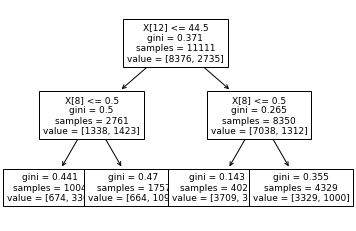

In [71]:
tree.plot_tree(clf1, fontsize=9)
text_representation=tree.export_text(clf1)

In [68]:
print(text_representation)

|--- feature_12 <= 44.50
|   |--- feature_8 <= 0.50
|   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- class: 1
|--- feature_12 >  44.50
|   |--- feature_8 <= 0.50
|   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- class: 0



In [70]:
feat_importance=pd.DataFrame(clf1.tree_.compute_feature_importances())
degiskenler=pd.DataFrame(xTrain.columns.values)
degiskenler

,0
0,DemClusterGroup_A
1,DemClusterGroup_B
2,DemClusterGroup_C
3,DemClusterGroup_Cluster_Null
4,DemClusterGroup_D
5,DemClusterGroup_E
6,DemClusterGroup_F
7,DemClusterGroup_U
8,DemGender_F
9,DemGender_Gender_Null


In [72]:
Train_Probs=clf1.predict_proba(xTrain)

In [73]:
Train_Probs

array([[0.76899977, 0.23100023],
       [0.92240736, 0.07759264],
       [0.76899977, 0.23100023],
       ...,
       [0.76899977, 0.23100023],
       [0.92240736, 0.07759264],
       [0.76899977, 0.23100023]])

In [74]:
# Burada alinan olasılıkalr veritablosuna çevirelim
Train_Probsdf=pd.DataFrame({'Prob0': Train_Probs[:,0] , 'Prob1' : Train_Probs[:,1]})

In [75]:
Train_Probsdf

,Prob0,Prob1
0,0.769000,0.231000
1,0.922407,0.077593
2,0.769000,0.231000
3,0.671315,0.328685
4,0.769000,0.231000
...,...,...
11106,0.922407,0.077593
11107,0.922407,0.077593
11108,0.769000,0.231000
11109,0.922407,0.077593
